In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv('C:\Data\MobilePrice.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1.0,0,7,0.6,188,2.0,...,20,756,2549,9,7,19,0,0,1,1
1,1021.0,1,0.5,1,0.0,1,53,0.7,136,3.0,...,905,1988,2631,17,3,7,1,1,0,2
2,563.0,1,0.5,1,2.0,1,41,0.9,145,5.0,...,1263,1716,2603,11,2,9,1,1,0,2
3,615.0,1,2.5,0,0.0,0,10,0.8,131,6.0,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821.0,1,1.2,0,13.0,1,44,0.6,141,2.0,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   float64
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   float64
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

In [4]:
df.nunique()

battery_power    1094
blue             1001
clock_speed       747
dual_sim            2
fc                 43
four_g              2
int_memory         65
m_dep              11
mobile_wt         184
n_cores            17
pc                142
px_height        1137
px_width         1130
ram              2015
sc_h              758
sc_w              891
talk_time          19
three_g            19
touch_screen       21
wifi                2
price_range         4
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.dropna()
df=df[['battery_power','blue', 'clock_speed', 'dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores', 'pc', 'px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi','price_range']]
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1.0,0,7,0.6,188,2.0,...,20,756,2549,9,7,19,0,0,1,1
1,1021.0,1,0.5,1,0.0,1,53,0.7,136,3.0,...,905,1988,2631,17,3,7,1,1,0,2
2,563.0,1,0.5,1,2.0,1,41,0.9,145,5.0,...,1263,1716,2603,11,2,9,1,1,0,2
3,615.0,1,2.5,0,0.0,0,10,0.8,131,6.0,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821.0,1,1.2,0,13.0,1,44,0.6,141,2.0,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1,0.5,1,0.0,1,2,0.8,106,6.0,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965.0,1,2.6,1,0.0,0,39,0.2,187,4.0,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911.0,0,0.9,1,1.0,1,36,0.7,108,8.0,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512.0,0,0.9,0,4.0,1,46,0.1,145,5.0,...,336,670,869,18,10,19,1,1,1,0


In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1.0,0,7,0.6,188,2.0,...,20,756,2549,9,7,19,0,0,1,1
1,1021.0,1,0.5,1,0.0,1,53,0.7,136,3.0,...,905,1988,2631,17,3,7,1,1,0,2
2,563.0,1,0.5,1,2.0,1,41,0.9,145,5.0,...,1263,1716,2603,11,2,9,1,1,0,2
3,615.0,1,2.5,0,0.0,0,10,0.8,131,6.0,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821.0,1,1.2,0,13.0,1,44,0.6,141,2.0,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<Axes: xlabel='dual_sim', ylabel='price_range'>

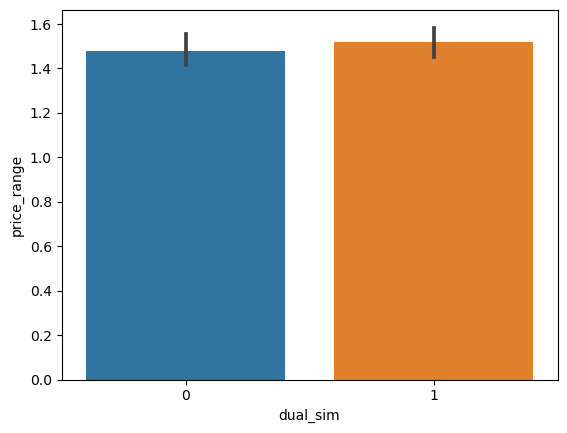

In [11]:
sns.barplot(x=df['dual_sim'],y=df['price_range'])

<Axes: xlabel='blue', ylabel='price_range'>

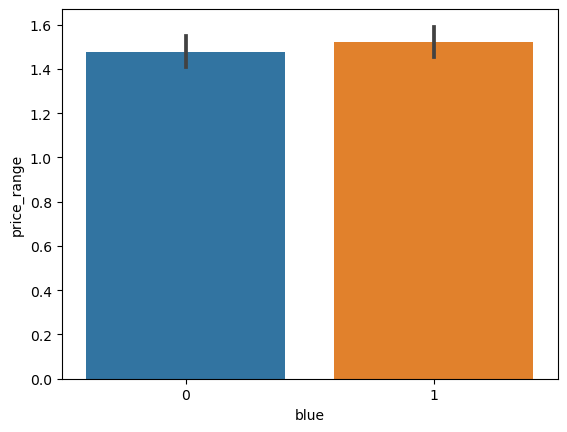

In [12]:
sns.barplot(x=df['blue'],y=df['price_range'])

<Axes: xlabel='wifi', ylabel='price_range'>

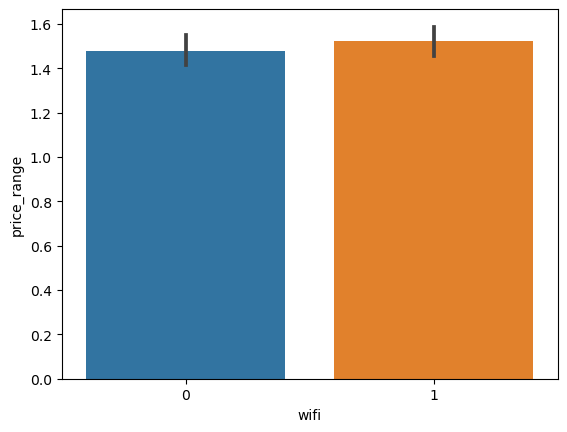

In [13]:
sns.barplot(x=df['wifi'],y=df['price_range'])

In [14]:
df.corr()['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [15]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1.0,0,7,0.6,188,2.0,...,20,756,2549,9,7,19,0,0,1,1
1,1021.0,1,0.5,1,0.0,1,53,0.7,136,3.0,...,905,1988,2631,17,3,7,1,1,0,2
2,563.0,1,0.5,1,2.0,1,41,0.9,145,5.0,...,1263,1716,2603,11,2,9,1,1,0,2
3,615.0,1,2.5,0,0.0,0,10,0.8,131,6.0,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821.0,1,1.2,0,13.0,1,44,0.6,141,2.0,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1,0.5,1,0.0,1,2,0.8,106,6.0,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965.0,1,2.6,1,0.0,0,39,0.2,187,4.0,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911.0,0,0.9,1,1.0,1,36,0.7,108,8.0,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512.0,0,0.9,0,4.0,1,46,0.1,145,5.0,...,336,670,869,18,10,19,1,1,1,0


In [16]:
X= df[['battery_power','blue', 'clock_speed', 'dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores', 'pc', 'px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']]
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842.0,0,2.2,0,1.0,0,7,0.6,188,2.0,2,20,756,2549,9,7,19,0,0,1
1,1021.0,1,0.5,1,0.0,1,53,0.7,136,3.0,6,905,1988,2631,17,3,7,1,1,0
2,563.0,1,0.5,1,2.0,1,41,0.9,145,5.0,6,1263,1716,2603,11,2,9,1,1,0
3,615.0,1,2.5,0,0.0,0,10,0.8,131,6.0,9,1216,1786,2769,16,8,11,1,0,0
4,1821.0,1,1.2,0,13.0,1,44,0.6,141,2.0,14,1208,1212,1411,8,2,15,1,1,0


In [17]:
Y= np.where(df['price_range'].shift(-1)>df['price_range'],1,-1)

In [18]:
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [19]:
#decisionTree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print(model)

accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

DecisionTreeClassifier()
Train_data Accuracy: 1.00
Test_data Accuracy: 0.67


In [20]:
probability = model.predict_proba(X_test)
print(probability)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [21]:
predicted = model.predict(X_test)
predicted

array([-1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,
        1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,
        1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,
        1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1

In [22]:
from sklearn import metrics

In [23]:
print(metrics.confusion_matrix(Y_test, predicted))

[[270 102]
 [ 96 132]]


In [24]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.74      0.73      0.73       372
           1       0.56      0.58      0.57       228

    accuracy                           0.67       600
   macro avg       0.65      0.65      0.65       600
weighted avg       0.67      0.67      0.67       600



In [25]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.78
Test_data Accuracy: 0.74


In [27]:
probability = knn.predict_proba(X_test)
print(probability)

[[1.         0.        ]
 [0.13333333 0.86666667]
 [0.8        0.2       ]
 ...
 [1.         0.        ]
 [0.4        0.6       ]
 [0.93333333 0.06666667]]


In [28]:
predicted = knn.predict(X_test)

In [29]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, predicted))

[[285  87]
 [ 68 160]]


In [30]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.81      0.77      0.79       372
           1       0.65      0.70      0.67       228

    accuracy                           0.74       600
   macro avg       0.73      0.73      0.73       600
weighted avg       0.75      0.74      0.74       600



In [31]:
#logistic
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [32]:
lr = LogisticRegression()
lr = lr.fit (X_train,Y_train)

In [33]:
probability = lr.predict_proba(X_test)
print(probability)

[[0.91199085 0.08800915]
 [0.51492953 0.48507047]
 [0.85436722 0.14563278]
 ...
 [0.93246772 0.06753228]
 [0.23952039 0.76047961]
 [0.91515712 0.08484288]]


In [34]:
accuracy_train = accuracy_score(Y_train, lr.predict(X_train))
accuracy_test = accuracy_score(Y_test, lr.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.75
Test_data Accuracy: 0.73


In [35]:
predic = lr.predict(X_test)
print(metrics.confusion_matrix(Y_test, predic))

[[309  63]
 [ 96 132]]


In [36]:
print(metrics.classification_report(Y_test, predic))

              precision    recall  f1-score   support

          -1       0.76      0.83      0.80       372
           1       0.68      0.58      0.62       228

    accuracy                           0.73       600
   macro avg       0.72      0.70      0.71       600
weighted avg       0.73      0.73      0.73       600



In [37]:
#RandomForest
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [38]:
rfc = RandomForestClassifier(n_estimators=16)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16)

In [39]:
probability = rfc.predict_proba(X_test)
print(probability)

[[0.9375 0.0625]
 [0.25   0.75  ]
 [1.     0.    ]
 ...
 [0.875  0.125 ]
 [0.4375 0.5625]
 [0.9375 0.0625]]


In [40]:
accuracy_train = accuracy_score(Y_train, rfc.predict(X_train))
accuracy_test = accuracy_score(Y_test, rfc.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.99
Test_data Accuracy: 0.72


In [41]:
from sklearn.metrics import confusion_matrix
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(Y_test, rfc_pred))

[[300  72]
 [ 98 130]]


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

          -1       0.75      0.81      0.78       372
           1       0.64      0.57      0.60       228

    accuracy                           0.72       600
   macro avg       0.70      0.69      0.69       600
weighted avg       0.71      0.72      0.71       600



In [43]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

In [44]:
#Initializing the MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=(600,300,150), max_iter=300,activation = 'relu',solver='adam',random_state=1)

#Fitting the training data to the network
mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(600, 300, 150), max_iter=300, random_state=1)

In [45]:
accuracy_Train = accuracy_score(Y_train, mlp.predict(X_train))
accuracy_Test = accuracy_score(Y_test, mlp.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_Train)
print ('Test_data Accuracy: %.2f' %accuracy_Test)

Train_data Accuracy: 0.74
Test_data Accuracy: 0.70


In [46]:
from sklearn.metrics import confusion_matrix
mlp_pred = mlp.predict(X_test)
print(confusion_matrix(Y_test, mlp_pred))

[[331  41]
 [136  92]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, mlp_pred))

              precision    recall  f1-score   support

          -1       0.71      0.89      0.79       372
           1       0.69      0.40      0.51       228

    accuracy                           0.70       600
   macro avg       0.70      0.65      0.65       600
weighted avg       0.70      0.70      0.68       600



In [48]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,Y_train)

GaussianNB()

In [49]:
accuracy_Train = accuracy_score(Y_train, gb.predict(X_train))
accuracy_Test = accuracy_score(Y_test, gb.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_Train)
print ('Test_data Accuracy: %.2f' %accuracy_Test)

Train_data Accuracy: 0.76
Test_data Accuracy: 0.76


In [50]:
from sklearn.metrics import confusion_matrix
gb_pred = gb.predict(X_test)
print(confusion_matrix(Y_test, gb_pred))

[[300  72]
 [ 72 156]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, gb_pred))

              precision    recall  f1-score   support

          -1       0.81      0.81      0.81       372
           1       0.68      0.68      0.68       228

    accuracy                           0.76       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.76      0.76      0.76       600



In [52]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sv=SVC(kernel='linear',random_state=0)
sv.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

In [53]:
# accuracy score, confusion matrix and classification report of knn

sv_acc = accuracy_score(Y_test, sv.predict(X_test))

print(f"Training Accuracy of SVM is {accuracy_score(Y_train, sv.predict(X_train))}")
print(f"Test Accuracy of SVM is {sv_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, sv.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, sv.predict(X_test))}")

Training Accuracy of SVM is 0.7535714285714286
Test Accuracy of SVM is 0.7633333333333333 

Confusion Matrix :- 
[[316  56]
 [ 86 142]]

Classification Report :- 
               precision    recall  f1-score   support

          -1       0.79      0.85      0.82       372
           1       0.72      0.62      0.67       228

    accuracy                           0.76       600
   macro avg       0.75      0.74      0.74       600
weighted avg       0.76      0.76      0.76       600

